# Titanic Data Exploration (Beginner Analysis)

This notebook performs simple data exploration on the Titanic dataset.  
The goal is to understand survival patterns before training any machine learning model.

**Key Insights:**
- The dataset contains missing values (especially in Age).
- Survival rates differ significantly between genders.
- This early exploratory step helps us make better modeling decisions later.

## Introduction

This notebook explores the Titanic passenger dataset to understand patterns in survival rates.  
Instead of building a machine learning model, our focus is on gaining insights from the data.

We will:
- Import and inspect the dataset
- Identify missing values
- Analyze survival statistics
- Compare survival by gender

This is an important first step before any feature engineering or model building.


## 1. Import Libraries
- We start by importing the `pandas` library, which helps us work with table-like data.

## 2. Load Dataset
- We load the dataset into a DataFrame so we can explore and analyze it.

## 3. View Sample Data
- Let's look at the first few rows to understand what kind of information we have.

## 4. Check Missing Values
- We check which columns have missing values. This matters because missing data affects analysis and model accuracy.

## 5. Basic Insights
- We calculate some basic statistics to understand how different factors relate to survival.
- Survival Count
- Average Age
- Survival by Gender

## Conclusion

- Females had a higher survival rate compared to males.
- Age has missing values, so we would need to handle those before modeling.
- Gender appears to be a strong predictor of survival in this dataset.

This initial analysis helps us understand the dataset better before moving on to building classification models.


In [1]:
# import panda
import pandas as pd

In [2]:
# Read - CSV file
df = pd.read_csv("/kaggle/input/titanic-machine-learning-from-disaster/train.csv")

In [3]:
# top 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# This line shows the number of rows and columns present in the DataFrame
df.shape

(891, 12)

In [5]:
# last 5 rows
df.tail()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
# Random rows
df.sample(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
194,195,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44.0,0,0,PC 17610,27.7208,B4,C
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S
56,57,1,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,10.5000,NaN,S
414,415,1,3,"Sundman, Mr. Johan Julian",male,44.0,0,0,STON/O 2. 3101269,7.9250,NaN,S
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5000,T,S
580,581,1,2,"Christy, Miss. Julie Rachel",female,25.0,1,1,237789,30.0000,NaN,S
171,172,0,3,"Rice, Master. Arthur",male,4.0,4,1,382652,29.1250,NaN,Q
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0000,NaN,S


In [7]:
# If you want to see all columns properly
pd.set_option('display.max_columns', None)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# find NaN values and count the value
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Count how many passengers survived vs not survived
df['Survived'].value_counts()

# Calculate the average age of passengers
df['Age'].mean()

# Compare survival rate between male and female passengers
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

### Survival Rate by Gender

We visualize the average survival probability for male and female passengers.  
This helps us see whether gender influenced survival chances on the Titanic.

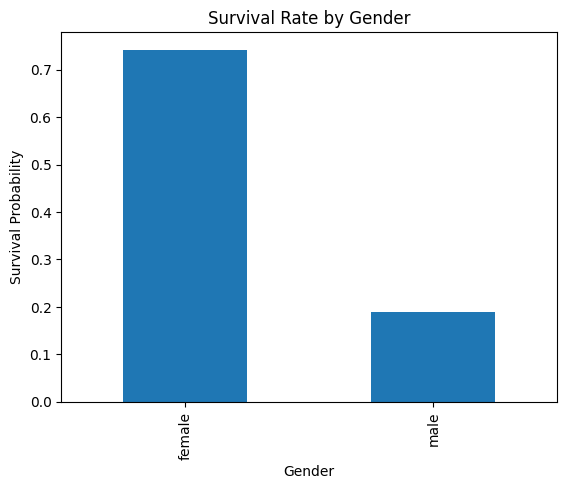

In [10]:
import matplotlib.pyplot as plt

# Survival rate by gender plot
df.groupby('Sex')['Survived'].mean().plot(kind='bar')

plt.title('Survival Rate by Gender')
plt.ylabel('Survival Probability')
plt.xlabel('Gender')
plt.show()

The bar chart shows that female passengers had a significantly higher survival rate compared to male passengers. This reflects how women and children were prioritized during the evacuation.

Female passengers had a higher survival rate compared to males.
Handling missing data and creating better features would improve model performance.